# Brexit

Dataset taken from https://www.pippanorris.com/data  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit
import clustergraph.plot_graph as pg

from sklearn.cluster import KMeans

In [2]:
full_df = pd.read_csv("data/brexitdata", sep="\t", encoding="iso-8859-1")
print(full_df.shape)
full_df.head()

(631, 391)


,pano,ONSConstID,ConstituencyName,Country,Region,ConstituencyType,Winner17,Con17,Lab17,LD17,...,nore,york,east,west,eeng,wale,lond,swes,swee,pt
0,1,W07000049,Aberavon,Wales,Wales,County,Labour,17.737766,68.119514,1.800529,...,0,0,0,0,0,1,0,0,0,1
1,2,W07000058,Aberconwy,Wales,Wales,County,Conservative,44.594090,42.618974,2.926905,...,0,0,0,0,0,1,0,0,0,2
2,3,S14000001,Aberdeen North,Scotland,Scotland,Borough,Scottish National Party,22.692276,30.010610,4.605925,...,0,0,0,0,0,0,0,0,0,3
3,4,S14000002,Aberdeen South,Scotland,Scotland,Borough,Conservative,42.132470,20.549300,5.866091,...,0,0,0,0,0,0,0,0,0,4
4,5,S14000058,West Aberdeenshire and Kincardine,Scotland,Scotland,County,Conservative,47.852785,11.052785,8.641162,...,0,0,0,0,0,0,0,0,0,5


In this whole example we use the simplified socio-economical data gathering information about housing, relationship, number of cars, profession, self assessed health as well as the level of deprivation of the area the constituancy is located.

In [3]:
subset = [
    "c11HouseOutright",
    "c11HouseMortgage",
    "c11HouseholdOnePerson",
    "c11HouseholdMarried",
    "c11CarsNone",
    "c11CarsOne",
    "c11CarsTwo",
    "c11NSSECLowerManager",
    "c11QualNone",
    "c11QualLevel4",
    "c11HealthVeryGood",
    "c11HealthGood",
    "c11DeprivedNone",
    "c11Deprived1",
]

X = full_df[subset].copy().to_numpy()

coloring_subset = ["leaveHanretty", "lm17", "cm17"]
coloring_df = full_df[coloring_subset].copy()

## Clustering

In [4]:
model = KMeans(20, random_state=42)
pred = model.fit_predict(X)

## ClusterGraph

In [5]:
cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(pred), X=X, metric_clusters="average"
)

# add coloring functions
cluster_g.add_coloring(coloring_df)

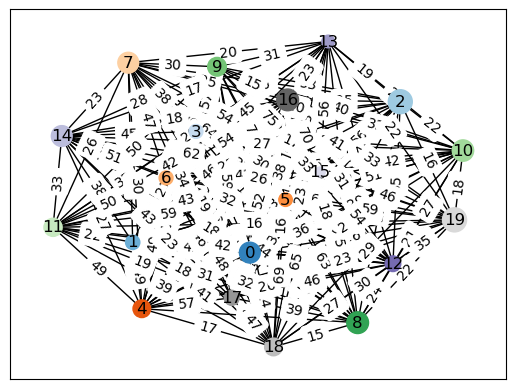

In [6]:
# Coloring the graph with the node labels (with no decimal digits on the edge labels)
cluster_g.color_graph()
pg.draw_graph(cluster_g.Graph, size_nodes=1000, random_state=42, precision=0)

## Connectivity pruning

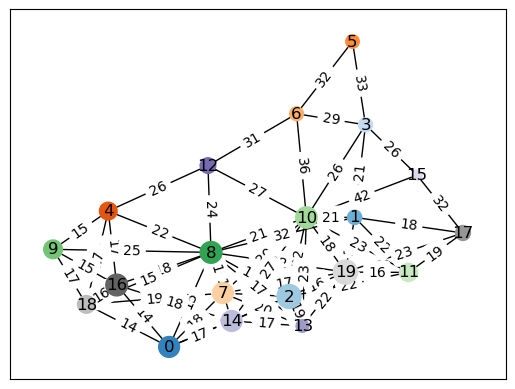

In [7]:
connectivity_graph, conn = cluster_g.prune_conn(score=True)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=130)
pg.draw_graph(connectivity_graph, size_nodes=1000, random_state=42, precision=0)

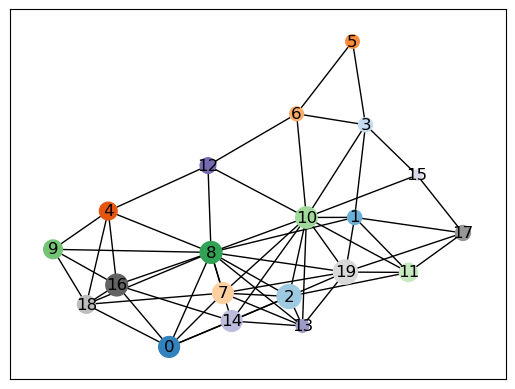

In [8]:
# we can decide not to draw the edge labels
pg.draw_graph(
    connectivity_graph, size_nodes=1000, random_state=42, draw_edge_labels=False
)

# Color by different indicators

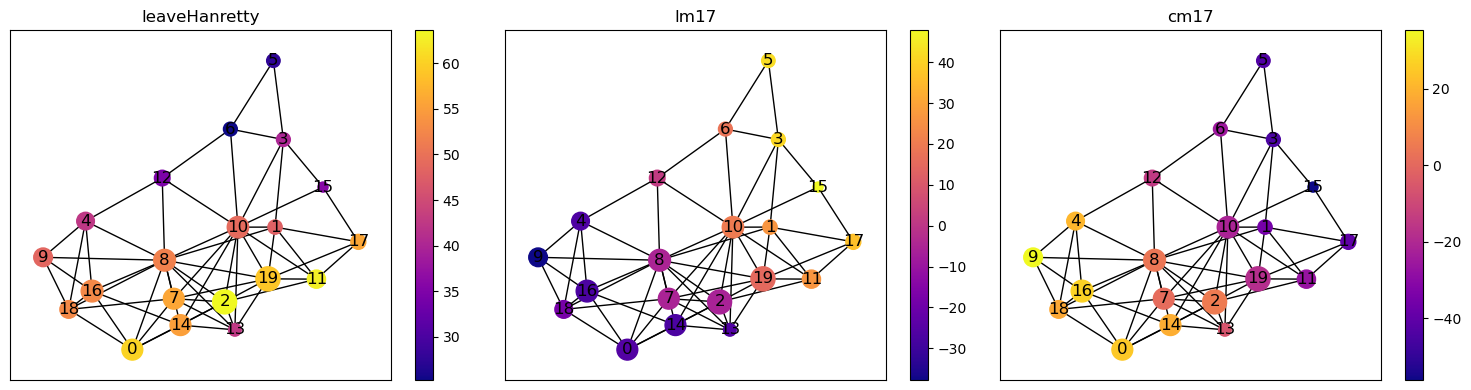

In [10]:
# with a colorbar
from matplotlib.cm import ScalarMappable

fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
cmap = plt.get_cmap("plasma")

for i, var in enumerate(["leaveHanretty", "lm17", "cm17"]):

    # color by that variable
    cluster_g.color_graph(
        node_type_coloring="variable",
        node_variable=var,
        node_palette=cmap,
    )
    connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=130)
    pg.draw_graph(
        connectivity_graph,
        size_nodes=1000,
        random_state=42,
        ax=axs[i],
        draw_edge_labels=False,
    )

    # Create a ScalarMappable with the colormap
    min_var = min([connectivity_graph.nodes[n][var] for n in connectivity_graph.nodes])
    max_var = max([connectivity_graph.nodes[n][var] for n in connectivity_graph.nodes])

    norm = plt.Normalize(min_var, max_var)
    mappable = ScalarMappable(norm=norm, cmap=cmap)

    # Add a colorbar to the axis
    cbar = fig.colorbar(mappable, ax=axs[i])

    axs[i].set_title(var)

plt.tight_layout()
plt.show()